In [23]:
# Importing the required modules
import pandas as pd

#Importing Excel file
file = 'movie-ratings.xlsx'

#Loading file in a df
df = pd.read_excel(file, sheet_name='Hoja1')


#Showing the df
print(df)

      Nota                                   Título  \
0        9                   The White Lotus (2021)   
1        7        El ingenio del amo de casa (2021)   
2        8           De yakuza a amo de casa (2021)   
3        6                Utoya. 22 de julio (2018)   
4        7                  Apagón: Negación (2022)   
...    ...                                      ...   
1916     7  Black Mirror: Ahora mismo vuelvo (2013)   
1917     6          Black Mirror: Oso blanco (2013)   
1918     5    Black Mirror: El momento Waldo (2013)   
1919    10                            [•REC] (2007)   
1920     8                           [•REC]² (2009)   

                               Fecha  
0          9 de enero de 2023, 22:55  
1          6 de enero de 2023, 13:16  
2          4 de enero de 2023, 00:08  
3          4 de enero de 2023, 00:06  
4          2 de enero de 2023, 23:40  
...                              ...  
1916  21 de diciembre de 2013, 22:52  
1917  21 de diciembre de 20

In [24]:
#Checking rows and columns
df.shape

(1921, 3)

In [25]:
#Info from df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nota    1921 non-null   int64 
 1   Título  1921 non-null   object
 2   Fecha   1921 non-null   object
dtypes: int64(1), object(2)
memory usage: 45.1+ KB


In [26]:
#Extract movie year and create a new column with.
import re

df["movie_year"]=df["Título"].str.extract('(\d\d\d\d)')

#Extract month of "Fecha" and create a new column with.
df["month_vote"]=df["Fecha"].str.extract('(enero|febrero|marzo|abril|mayo|junio|julio|agosto|septiembre|octubre|noviembre|diciembre)')

#Extract year of "Fecha" and create a new column with.
df["year_vote"]=df["Fecha"].str.extract('(\d\d\d\d)')

# Generate a column with month_vote and year_vote
df['month_year_vote'] = df.month_vote.str.cat(df.year_vote, sep=' ')

#Extract hour of "Fecha" and create a new column with.
df["hour_vote"]=df["Fecha"].str.extract('(\d\d:\d\d)')

#Convert hour_column in datetime value.
df['hour_vote'] = pd.to_datetime(df['hour_vote'])

#Assign new value AM or PM that shows if the movie its voted at morning or at afternoon.
df['AM/PM'] = pd.to_datetime(df['hour_vote']).dt.strftime('%p')

In [27]:
df

,Nota,Título,Fecha,movie_year,month_vote,year_vote,month_year_vote,hour_vote,AM/PM
0,9,The White Lotus (2021),"9 de enero de 2023, 22:55",2021,enero,2023,enero 2023,2023-02-07 22:55:00,PM
1,7,El ingenio del amo de casa (2021),"6 de enero de 2023, 13:16",2021,enero,2023,enero 2023,2023-02-07 13:16:00,PM
2,8,De yakuza a amo de casa (2021),"4 de enero de 2023, 00:08",2021,enero,2023,enero 2023,2023-02-07 00:08:00,AM
3,6,Utoya. 22 de julio (2018),"4 de enero de 2023, 00:06",2018,enero,2023,enero 2023,2023-02-07 00:06:00,AM
4,7,Apagón: Negación (2022),"2 de enero de 2023, 23:40",2022,enero,2023,enero 2023,2023-02-07 23:40:00,PM
...,...,...,...,...,...,...,...,...,...
1916,7,Black Mirror: Ahora mismo vuelvo (2013),"21 de diciembre de 2013, 22:52",2013,diciembre,2013,diciembre 2013,2023-02-07 22:52:00,PM
1917,6,Black Mirror: Oso blanco (2013),"21 de diciembre de 2013, 22:51",2013,diciembre,2013,diciembre 2013,2023-02-07 22:51:00,PM
1918,5,Black Mirror: El momento Waldo (2013),"21 de diciembre de 2013, 22:51",2013,diciembre,2013,diciembre 2013,2023-02-07 22:51:00,PM
1919,10,[•REC] (2007),"3 de octubre de 2009, 23:25",2007,octubre,2009,octubre 2009,2023-02-07 23:25:00,PM


In [28]:
import matplotlib.pyplot as plt

# Building a DF with the frequency of views per year and sorted by years
views_per_year = pd.DataFrame(df['year_vote'].value_counts()).reset_index().sort_values(["index"])

In [29]:
views_per_year

,index,year_vote
11,2009,2
8,2013,132
1,2014,293
0,2015,320
2,2016,207
5,2017,161
3,2018,195
9,2019,131
6,2020,154
7,2021,136


In [30]:
x = views_per_year.iloc[:,0]
x

11    2009
8     2013
1     2014
0     2015
2     2016
5     2017
3     2018
9     2019
6     2020
7     2021
4     2022
10    2023
Name: index, dtype: object

In [31]:
y = views_per_year.iloc[:,1]
y

11      2
8     132
1     293
0     320
2     207
5     161
3     195
9     131
6     154
7     136
4     183
10      7
Name: year_vote, dtype: int64

In [32]:
views_per_year['year_vote']

11      2
8     132
1     293
0     320
2     207
5     161
3     195
9     131
6     154
7     136
4     183
10      7
Name: year_vote, dtype: int64

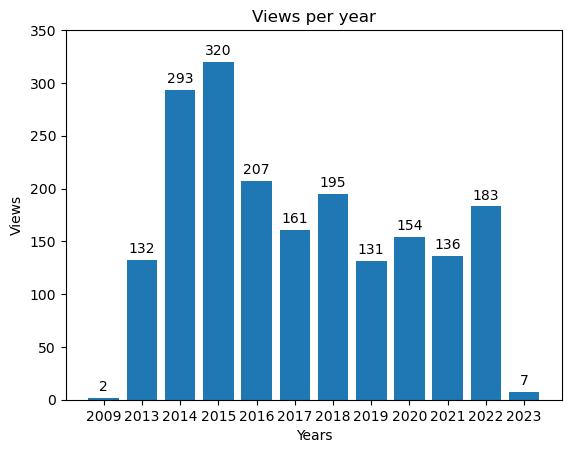

In [33]:
#Views per year barplot
barplot=plt.bar(x, y)
plt.bar_label(barplot, labels=y, label_type="edge", padding=3) #Putting label on the top of the bars
plt.ylim([0,350]) # Expanding the y axis
plt.title('Views per year') # Title name
plt.xlabel('Years') # x label name
plt.ylabel('Views') # y label name
plt.savefig('plots/views_year.png')

In [34]:
# Building a DF with the frequency of views per AM/PM time.

time_day = pd.DataFrame(df['AM/PM'].value_counts()).reset_index().sort_values(["index"])
time_day

,index,AM/PM
1,AM,361
0,PM,1560


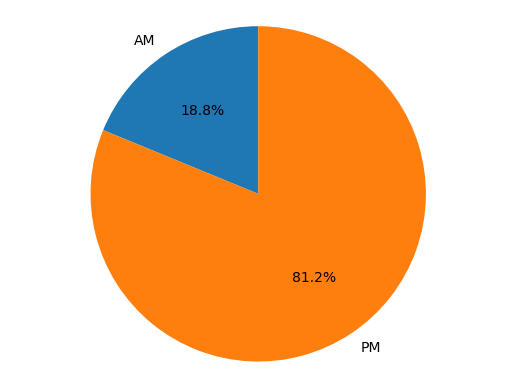

In [35]:
y2=time_day.iloc[:,1]
mylabels=time_day.iloc[:,0]

# Pie chart

fig1, ax1 = plt.subplots()
ax1.pie(y2, labels=mylabels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 
plt.savefig('plots/percentage_year.png')

In [36]:
# Building a DF with the frequency of views per month.
views_per_month = pd.DataFrame(df['month_vote'].value_counts()).reset_index().sort_values(["index"])

# Adding extra column with months in numbers
num_month=[4,8,12,1,2,7,6,3,5,11,10,9]
views_per_month["num_month"] = num_month
views_per_month_sorted = views_per_month.sort_values(["num_month"])
views_per_month_sorted["month_short"]=views_per_month_sorted["index"].str.extract('(\w\w\w)') # Column with months with 3 str
views_per_month_sorted

,index,month_vote,num_month,month_short
3,enero,167,1,ene
5,febrero,141,2,feb
10,marzo,121,3,mar
8,abril,130,4,abr
9,mayo,126,5,may
7,junio,137,6,jun
11,julio,112,7,jul
2,agosto,174,8,ago
1,septiembre,220,9,sep
4,octubre,163,10,oct


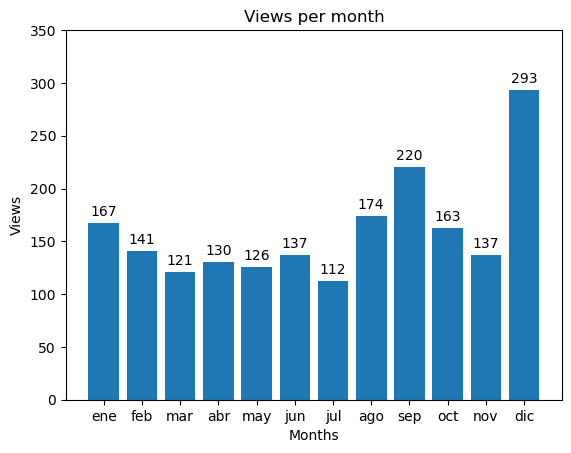

In [37]:
xm = views_per_month_sorted.iloc[:,3]
ym = views_per_month_sorted.iloc[:,1]

#Views per month barplot
barplot=plt.bar(xm, ym)
plt.bar_label(barplot, labels=ym, label_type="edge", padding=3) #Putting label on the top of the bars
plt.ylim([0,350]) # Expanding the y axis
plt.title('Views per month') # Title name
plt.xlabel('Months') # x label name
plt.ylabel('Views') # y label name
#plt.xticks(rotation=90)
plt.savefig('plots/views_per_month.png')

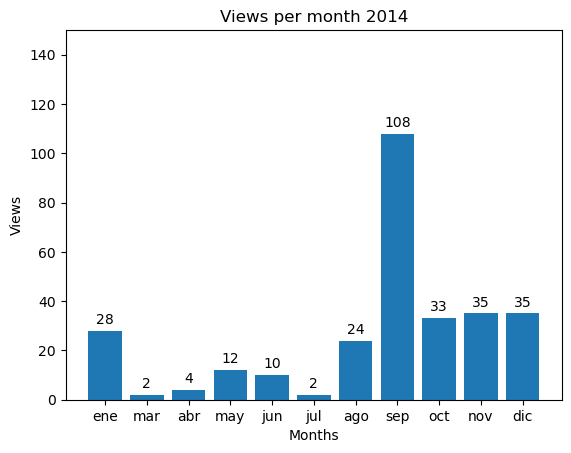

In [38]:
# Preparing df2014
df2014 = df[df['year_vote'] == "2014"]

# Views per month
views_per_month2014 = pd.DataFrame(df2014['month_vote'].value_counts()).reset_index().sort_values(["index"])

num_month=[4,8,12,1,7,6,3,5,11,10,9] # Array with months in numbers
views_per_month2014["num_month"] = num_month # Add a column with months in numbers
views_per_month2014_sorted = views_per_month2014.sort_values(["num_month"]) # Sorting values
views_per_month2014_sorted["month_short"]=views_per_month2014_sorted["index"].str.extract('(\w\w\w)') # Column with months with 3 str
views_per_month2014_sorted # Viasualization

# Preparing axis
xm = views_per_month2014_sorted.iloc[:,3]
ym = views_per_month2014_sorted.iloc[:,1]


#Views per month barplot
barplot=plt.bar(xm, ym)
plt.bar_label(barplot, labels=ym, label_type="edge", padding=3) #Putting label on the top of the bars
plt.ylim([0,150]) # Expanding the y axis
plt.title('Views per month 2014') # Title name
plt.xlabel('Months') # x label name
plt.ylabel('Views') # y label name
#plt.xticks(rotation=90)
plt.savefig('plots/views_per_month2014.png')

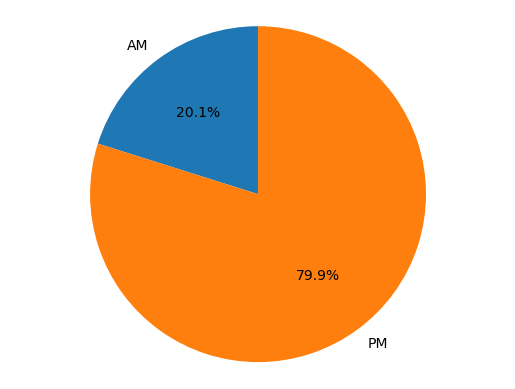

In [39]:
# Pie chart

# Preparing pie chart

time_day = pd.DataFrame(df2014['AM/PM'].value_counts()).reset_index().sort_values(["index"])
y2=time_day.iloc[:,1]
mylabels=time_day.iloc[:,0]

fig1, ax1 = plt.subplots()
ax1.pie(y2, labels=mylabels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.savefig('plots/percentage_per_month2014.png')

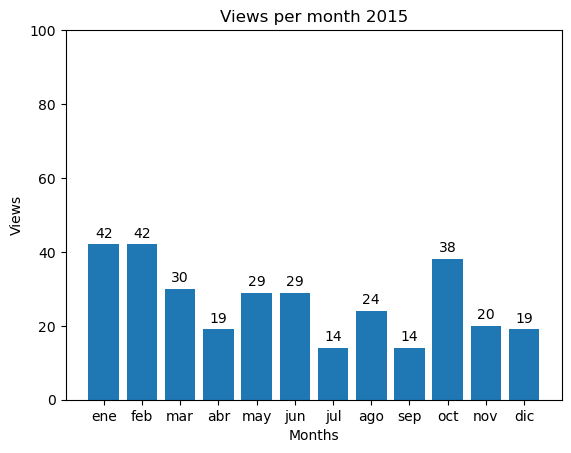

In [40]:
# Preparing df2015
df2015 = df[df['year_vote'] == "2015"]

# Views per month
views_per_month2015 = pd.DataFrame(df2015['month_vote'].value_counts()).reset_index().sort_values(["index"])

num_month=[4,8,12,1,2,7,6,3,5,11,10,9] # Array with months in numbers
views_per_month2015["num_month"] = num_month # Add a column with months in numbers
views_per_month2015_sorted = views_per_month2015.sort_values(["num_month"]) # Sorting values
views_per_month2015_sorted["month_short"]=views_per_month2015_sorted["index"].str.extract('(\w\w\w)') # Column with months with 3 str
views_per_month2015_sorted # Viasualization

# Preparing axis
xm = views_per_month2015_sorted.iloc[:,3]
ym = views_per_month2015_sorted.iloc[:,1]


#Views per month barplot
barplot=plt.bar(xm, ym)
plt.bar_label(barplot, labels=ym, label_type="edge", padding=3) #Putting label on the top of the bars
plt.ylim([0,100]) # Expanding the y axis
plt.title('Views per month 2015') # Title name
plt.xlabel('Months') # x label name
plt.ylabel('Views') # y label name
#plt.xticks(rotation=90)
plt.savefig('plots/views_per_month2015.png')

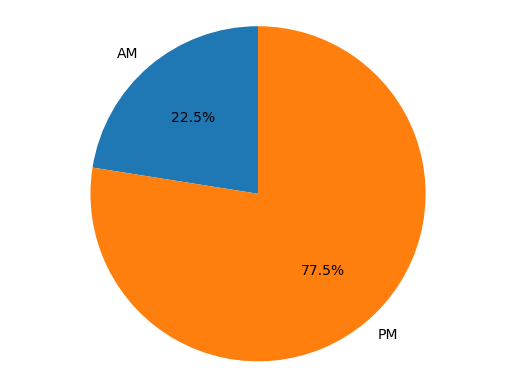

In [41]:
# Pie chart

# Preparing pie chart

time_day = pd.DataFrame(df2015['AM/PM'].value_counts()).reset_index().sort_values(["index"])
y2=time_day.iloc[:,1]
mylabels=time_day.iloc[:,0]

fig1, ax1 = plt.subplots()
ax1.pie(y2, labels=mylabels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.savefig('plots/percentage_per_month2015.png')

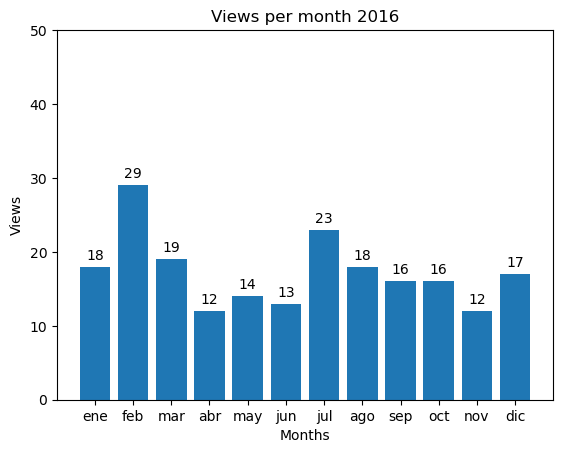

In [42]:
# Preparing df2016
df2016 = df[df['year_vote'] == "2016"]

# Views per month
views_per_month2016 = pd.DataFrame(df2016['month_vote'].value_counts()).reset_index().sort_values(["index"])

num_month=[4,8,12,1,2,7,6,3,5,11,10,9] # Array with months in numbers
views_per_month2016["num_month"] = num_month # Add a column with months in numbers
views_per_month2016_sorted = views_per_month2016.sort_values(["num_month"]) # Sorting values
views_per_month2016_sorted["month_short"]=views_per_month2016_sorted["index"].str.extract('(\w\w\w)') # Column with months with 3 str
views_per_month2016_sorted # Viasualization

# Preparing axis
xm = views_per_month2016_sorted.iloc[:,3]
ym = views_per_month2016_sorted.iloc[:,1]


#Views per month barplot
barplot=plt.bar(xm, ym)
plt.bar_label(barplot, labels=ym, label_type="edge", padding=3) #Putting label on the top of the bars
plt.ylim([0,50]) # Expanding the y axis
plt.title('Views per month 2016') # Title name
plt.xlabel('Months') # x label name
plt.ylabel('Views') # y label name
#plt.xticks(rotation=90)
plt.savefig('plots/views_per_month2016.png')

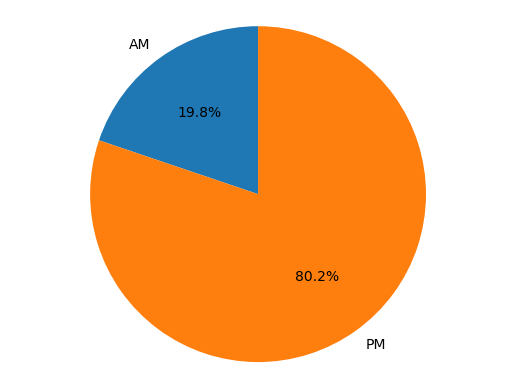

In [43]:
# Pie chart

# Preparing pie chart

time_day = pd.DataFrame(df2016['AM/PM'].value_counts()).reset_index().sort_values(["index"])
y2=time_day.iloc[:,1]
mylabels=time_day.iloc[:,0]

fig1, ax1 = plt.subplots()
ax1.pie(y2, labels=mylabels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.savefig('plots/percentage_per_month2016.png')

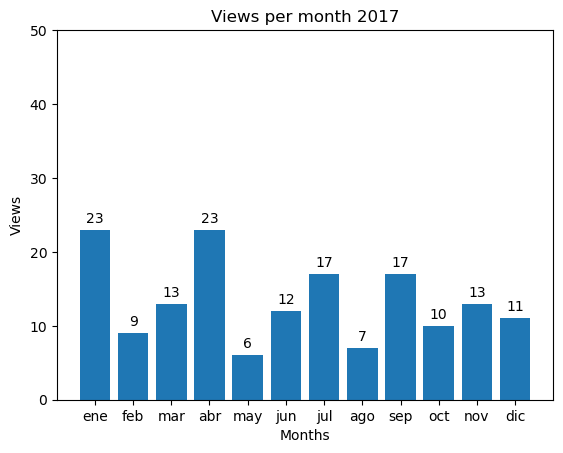

In [44]:
# Preparing df2017
df2017 = df[df['year_vote'] == "2017"]

# Views per month
views_per_month2017 = pd.DataFrame(df2017['month_vote'].value_counts()).reset_index().sort_values(["index"])

num_month=[4,8,12,1,2,7,6,3,5,11,10,9] # Array with months in numbers
views_per_month2017["num_month"] = num_month # Add a column with months in numbers
views_per_month2017_sorted = views_per_month2017.sort_values(["num_month"]) # Sorting values
views_per_month2017_sorted["month_short"]=views_per_month2017_sorted["index"].str.extract('(\w\w\w)') # Column with months with 3 str
views_per_month2017_sorted # Viasualization

# Preparing axis
xm = views_per_month2017_sorted.iloc[:,3]
ym = views_per_month2017_sorted.iloc[:,1]


#Views per month barplot
barplot=plt.bar(xm, ym)
plt.bar_label(barplot, labels=ym, label_type="edge", padding=3) #Putting label on the top of the bars
plt.ylim([0,50]) # Expanding the y axis
plt.title('Views per month 2017') # Title name
plt.xlabel('Months') # x label name
plt.ylabel('Views') # y label name
#plt.xticks(rotation=90)
plt.savefig('plots/views_per_month2017.png')

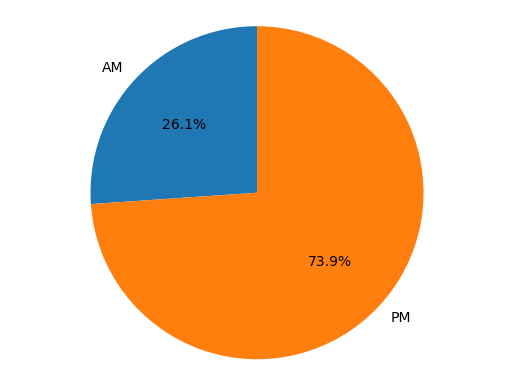

In [45]:
# Pie chart

# Preparing pie chart

time_day = pd.DataFrame(df2017['AM/PM'].value_counts()).reset_index().sort_values(["index"])
y2=time_day.iloc[:,1]
mylabels=time_day.iloc[:,0]

fig1, ax1 = plt.subplots()
ax1.pie(y2, labels=mylabels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.savefig('plots/percentage_per_month2017.png')

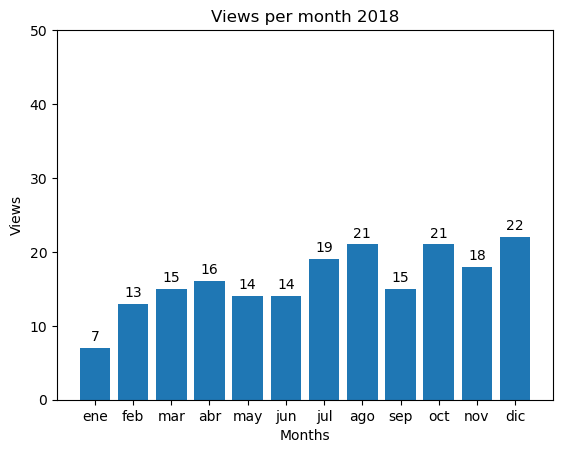

In [46]:
# Preparing df2018
df2018 = df[df['year_vote'] == "2018"]

# Views per month
views_per_month2018 = pd.DataFrame(df2018['month_vote'].value_counts()).reset_index().sort_values(["index"])

num_month=[4,8,12,1,2,7,6,3,5,11,10,9] # Array with months in numbers
views_per_month2018["num_month"] = num_month # Add a column with months in numbers
views_per_month2018_sorted = views_per_month2018.sort_values(["num_month"]) # Sorting values
views_per_month2018_sorted["month_short"]=views_per_month2018_sorted["index"].str.extract('(\w\w\w)') # Column with months with 3 str
views_per_month2018_sorted # Viasualization

# Preparing axis
xm = views_per_month2018_sorted.iloc[:,3]
ym = views_per_month2018_sorted.iloc[:,1]


#Views per month barplot
barplot=plt.bar(xm, ym)
plt.bar_label(barplot, labels=ym, label_type="edge", padding=3) #Putting label on the top of the bars
plt.ylim([0,50]) # Expanding the y axis
plt.title('Views per month 2018') # Title name
plt.xlabel('Months') # x label name
plt.ylabel('Views') # y label name
#plt.xticks(rotation=90)
plt.savefig('plots/views_per_month2018.png')

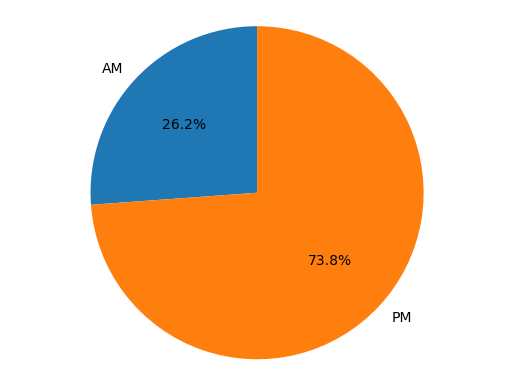

In [47]:
# Pie chart

# Preparing pie chart

time_day = pd.DataFrame(df2018['AM/PM'].value_counts()).reset_index().sort_values(["index"])
y2=time_day.iloc[:,1]
mylabels=time_day.iloc[:,0]

fig1, ax1 = plt.subplots()
ax1.pie(y2, labels=mylabels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.savefig('plots/percentage_per_month2018.png')

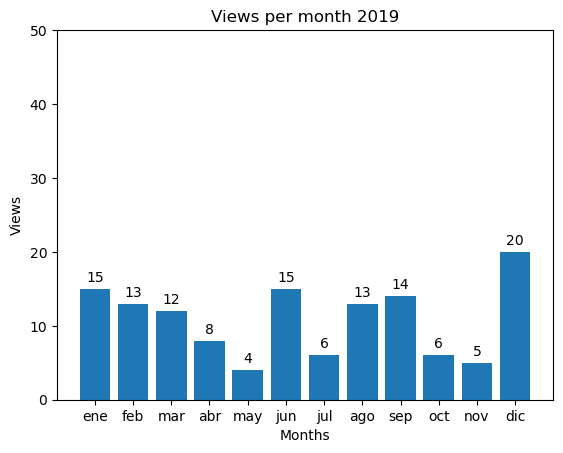

In [48]:
# Preparing df2019
df2019 = df[df['year_vote'] == "2019"]

# Views per month
views_per_month2019 = pd.DataFrame(df2019['month_vote'].value_counts()).reset_index().sort_values(["index"])

num_month=[4,8,12,1,2,7,6,3,5,11,10,9] # Array with months in numbers
views_per_month2019["num_month"] = num_month # Add a column with months in numbers
views_per_month2019_sorted = views_per_month2019.sort_values(["num_month"]) # Sorting values
views_per_month2019_sorted["month_short"]=views_per_month2019_sorted["index"].str.extract('(\w\w\w)') # Column with months with 3 str
views_per_month2019_sorted # Viasualization

# Preparing axis
xm = views_per_month2019_sorted.iloc[:,3]
ym = views_per_month2019_sorted.iloc[:,1]


#Views per month barplot
barplot=plt.bar(xm, ym)
plt.bar_label(barplot, labels=ym, label_type="edge", padding=3) #Putting label on the top of the bars
plt.ylim([0,50]) # Expanding the y axis
plt.title('Views per month 2019') # Title name
plt.xlabel('Months') # x label name
plt.ylabel('Views') # y label name
#plt.xticks(rotation=90)
plt.savefig('plots/views_per_month2019.png')

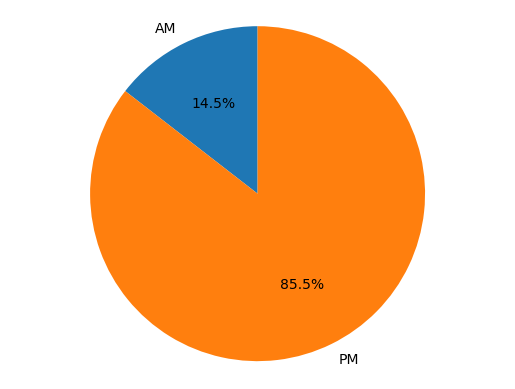

In [49]:
# Pie chart

# Preparing pie chart

time_day = pd.DataFrame(df2019['AM/PM'].value_counts()).reset_index().sort_values(["index"])
y2=time_day.iloc[:,1]
mylabels=time_day.iloc[:,0]

fig1, ax1 = plt.subplots()
ax1.pie(y2, labels=mylabels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.savefig('plots/percentage_per_month2019.png')

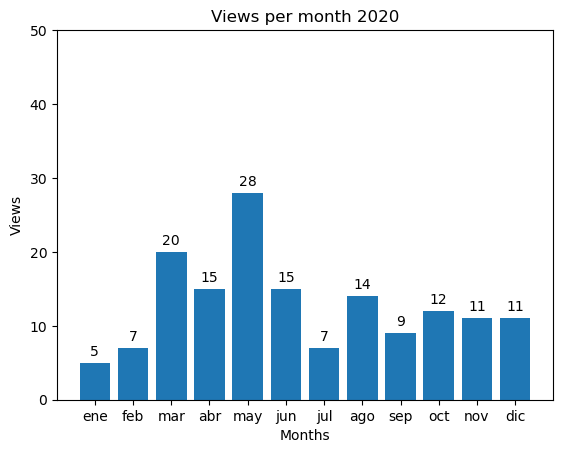

In [50]:
# Preparing df2020
df2020 = df[df['year_vote'] == "2020"]

# Views per month
views_per_month2020 = pd.DataFrame(df2020['month_vote'].value_counts()).reset_index().sort_values(["index"])

num_month=[4,8,12,1,2,7,6,3,5,11,10,9] # Array with months in numbers
views_per_month2020["num_month"] = num_month # Add a column with months in numbers
views_per_month2020_sorted = views_per_month2020.sort_values(["num_month"]) # Sorting values
views_per_month2020_sorted["month_short"]=views_per_month2020_sorted["index"].str.extract('(\w\w\w)') # Column with months with 3 str
views_per_month2020_sorted # Viasualization

# Preparing axis
xm = views_per_month2020_sorted.iloc[:,3]
ym = views_per_month2020_sorted.iloc[:,1]


#Views per month barplot
barplot=plt.bar(xm, ym)
plt.bar_label(barplot, labels=ym, label_type="edge", padding=3) #Putting label on the top of the bars
plt.ylim([0,50]) # Expanding the y axis
plt.title('Views per month 2020') # Title name
plt.xlabel('Months') # x label name
plt.ylabel('Views') # y label name
#plt.xticks(rotation=90)
plt.savefig('plots/views_per_month2020.png')

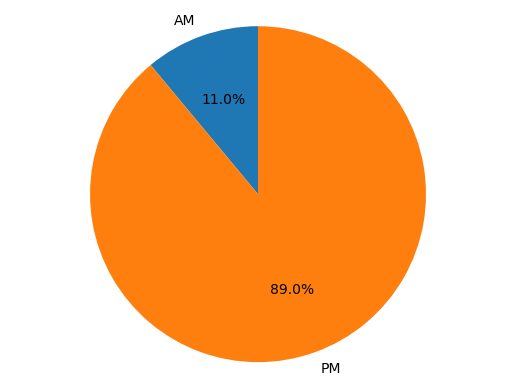

In [51]:
# Pie chart

# Preparing pie chart

time_day = pd.DataFrame(df2020['AM/PM'].value_counts()).reset_index().sort_values(["index"])
y2=time_day.iloc[:,1]
mylabels=time_day.iloc[:,0]

fig1, ax1 = plt.subplots()
ax1.pie(y2, labels=mylabels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.savefig('plots/percentage_per_month2020.png')

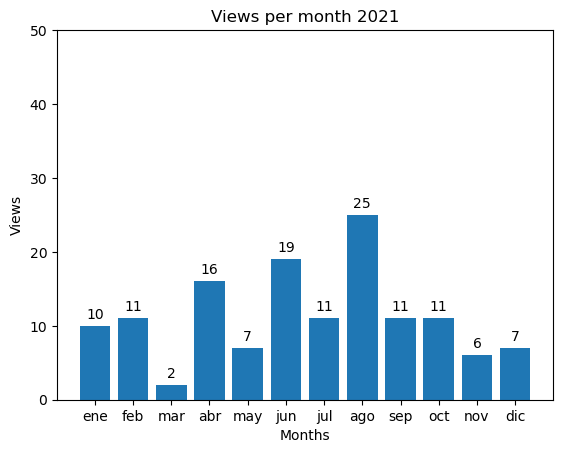

In [52]:
# Preparing df2021
df2021 = df[df['year_vote'] == "2021"]

# Views per month
views_per_month2021 = pd.DataFrame(df2021['month_vote'].value_counts()).reset_index().sort_values(["index"])

num_month=[4,8,12,1,2,7,6,3,5,11,10,9] # Array with months in numbers
views_per_month2021["num_month"] = num_month # Add a column with months in numbers
views_per_month2021_sorted = views_per_month2021.sort_values(["num_month"]) # Sorting values
views_per_month2021_sorted["month_short"]=views_per_month2021_sorted["index"].str.extract('(\w\w\w)') # Column with months with 3 str
views_per_month2021_sorted # Viasualization

# Preparing axis
xm = views_per_month2021_sorted.iloc[:,3]
ym = views_per_month2021_sorted.iloc[:,1]


#Views per month barplot
barplot=plt.bar(xm, ym)
plt.bar_label(barplot, labels=ym, label_type="edge", padding=3) #Putting label on the top of the bars
plt.ylim([0,50]) # Expanding the y axis
plt.title('Views per month 2021') # Title name
plt.xlabel('Months') # x label name
plt.ylabel('Views') # y label name
#plt.xticks(rotation=90)
plt.savefig('plots/views_per_month2021.png')

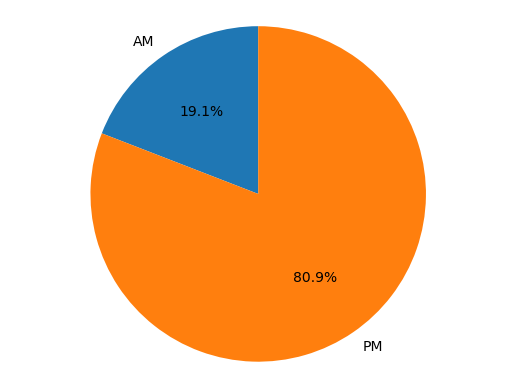

In [53]:
# Pie chart

# Preparing pie chart

time_day = pd.DataFrame(df2021['AM/PM'].value_counts()).reset_index().sort_values(["index"])
y2=time_day.iloc[:,1]
mylabels=time_day.iloc[:,0]

fig1, ax1 = plt.subplots()
ax1.pie(y2, labels=mylabels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.savefig('plots/percentage_per_month2021.png')

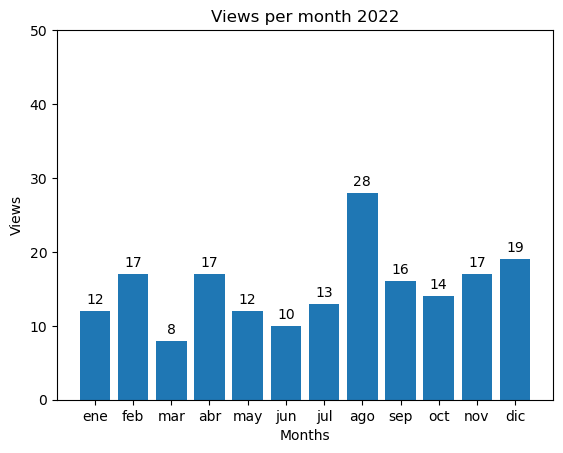

In [54]:
# Preparing df2022
df2022 = df[df['year_vote'] == "2022"]

# Views per month
views_per_month2022 = pd.DataFrame(df2022['month_vote'].value_counts()).reset_index().sort_values(["index"])

num_month=[4,8,12,1,2,7,6,3,5,11,10,9] # Array with months in numbers
views_per_month2022["num_month"] = num_month # Add a column with months in numbers
views_per_month2022_sorted = views_per_month2022.sort_values(["num_month"]) # Sorting values
views_per_month2022_sorted["month_short"]=views_per_month2022_sorted["index"].str.extract('(\w\w\w)') # Column with months with 3 str
views_per_month2022_sorted # Viasualization

# Preparing axis
xm = views_per_month2022_sorted.iloc[:,3]
ym = views_per_month2022_sorted.iloc[:,1]


#Views per month barplot
barplot=plt.bar(xm, ym)
plt.bar_label(barplot, labels=ym, label_type="edge", padding=3) #Putting label on the top of the bars
plt.ylim([0,50]) # Expanding the y axis
plt.title('Views per month 2022') # Title name
plt.xlabel('Months') # x label name
plt.ylabel('Views') # y label name
#plt.xticks(rotation=90)
plt.savefig('plots/views_per_month2022.png')

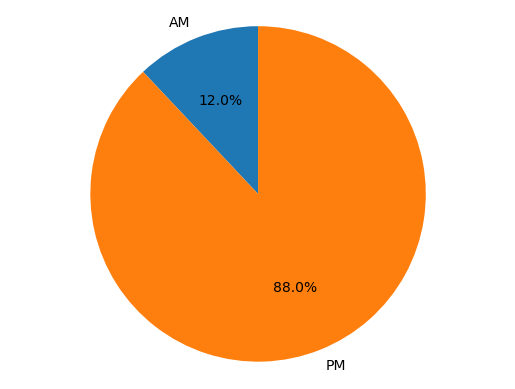

In [55]:
# Pie chart

# Preparing pie chart

time_day = pd.DataFrame(df2022['AM/PM'].value_counts()).reset_index().sort_values(["index"])
y2=time_day.iloc[:,1]
mylabels=time_day.iloc[:,0]

fig1, ax1 = plt.subplots()
ax1.pie(y2, labels=mylabels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.savefig('plots/percentage_per_month2022.png')